### RANDOM FOREST REGRESSOR

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np

### Reading the Datasets

In [2]:
data = pd.read_csv('Datasets/automobile.csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [3]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### Checking for NULL Values

In [4]:
data.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Replacing  the Numberical Features data with fillna

In [5]:
data[['normalized-losses']] = data[['normalized-losses']].fillna(data['normalized-losses'].mean())

###

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data[['num-of-doors']]= imputer.fit_transform(data[['num-of-doors']])
data.isnull().sum()



### Replacing  the categorical missing with fillna

In [6]:
data['num-of-doors']=data['num-of-doors'].fillna('four')

### CONVERTING TEXT into Numbers

In [7]:
#pip install word2number

In [8]:
from word2number.w2n import word_to_num

In [9]:
data['num-of-doors'] = data['num-of-doors'].apply(word_to_num)

In [10]:
data['num-of-cylinders']=data['num-of-cylinders'].apply(word_to_num)

In [11]:
for col in data:
    if data[col].dtype == 'O':
        print('Column name',col)
        print(data[col].unique())

Column name make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Column name fuel-type
['gas' 'diesel']
Column name aspiration
['std' 'turbo']
Column name body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column name drive-wheels
['rwd' 'fwd' '4wd']
Column name engine-location
['front' 'rear']
Column name engine-type
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
Column name fuel-system
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Column name bore
['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '?' '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']
Column name stroke
['2.68' '3.47' '3.4' '2.8' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46

### Replacing unwanted character with a interger

In [12]:
data = data.replace('?',0)

### Changing the data type

In [13]:
ob_columns = ['bore','stroke','horsepower','peak-rpm']

for col in ob_columns:
    data[col] = data[col].astype('float')
    data[col] = data[col].replace(0,data[col].mean())
    print(col , data[col].dtype)

bore float64
stroke float64
horsepower float64
peak-rpm float64


In [14]:
for col in data:
    if data[col].dtype == 'O':
        print(col)

make
fuel-type
aspiration
body-style
drive-wheels
engine-location
engine-type
fuel-system


### Converting the Categorical Values into Numerical Values using Label Encoding

In [15]:
makes = LabelEncoder()
data['make'] = makes.fit_transform(data['make'])


In [16]:
fueltypes = LabelEncoder()
data['fuel-type'] = fueltypes.fit_transform(data['fuel-type'])


In [17]:
aspirations = LabelEncoder()
data['aspiration'] = aspirations.fit_transform(data['aspiration'])


In [18]:
bodystyles = LabelEncoder()
data['body-style'] = bodystyles.fit_transform(data['body-style'])
      

In [19]:
drivewheelss = LabelEncoder()
data['drive-wheels'] = drivewheelss.fit_transform(data['drive-wheels'])   

In [20]:
enginelocations = LabelEncoder()
data['engine-location'] = enginelocations.fit_transform(data['engine-location'])

In [21]:
fuelsystems  = LabelEncoder()
data['fuel-system'] = fuelsystems.fit_transform(data['fuel-system'])

In [22]:
enginetypes  = LabelEncoder()
data['engine-type'] = enginetypes.fit_transform(data['engine-type'])

In [23]:
data.dtypes

symboling              int64
normalized-losses    float64
make                   int32
fuel-type              int32
aspiration             int32
num-of-doors           int64
body-style             int32
drive-wheels           int32
engine-location        int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int32
num-of-cylinders       int64
engine-size            int64
fuel-system            int32
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### Checking for Outliers 

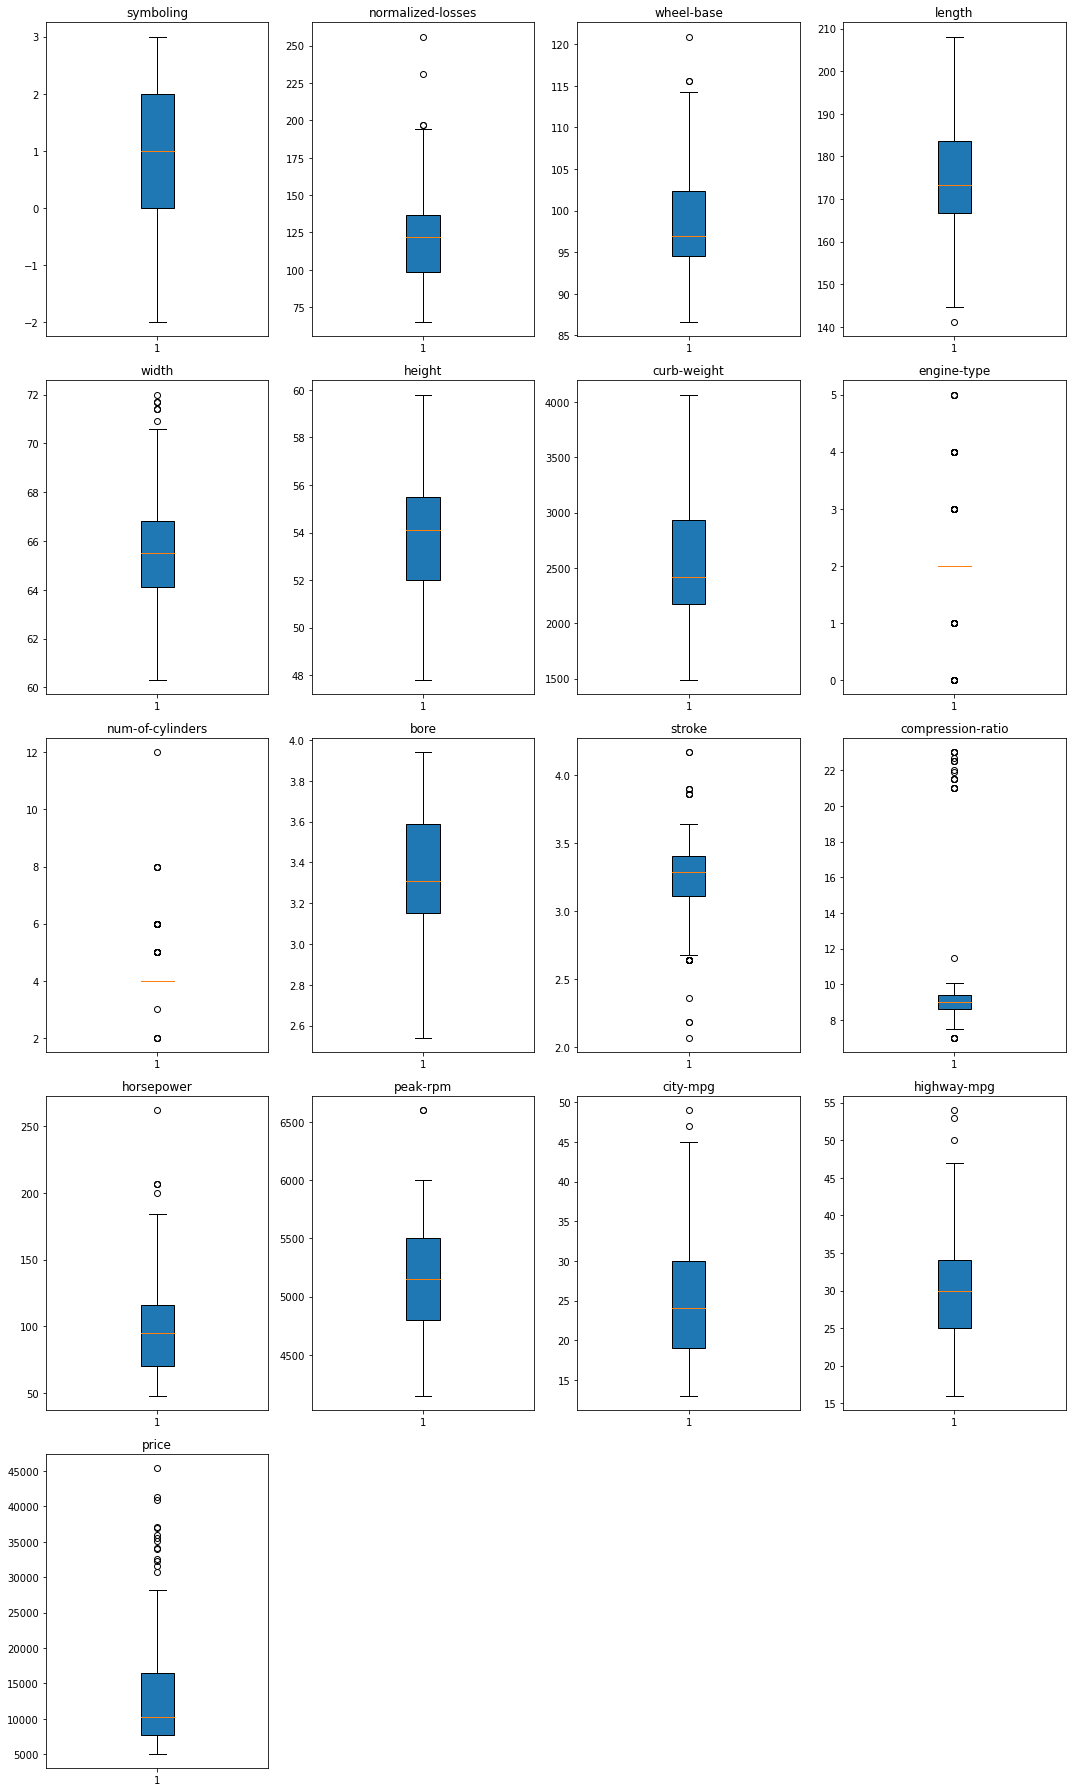

In [24]:
import matplotlib.pyplot as plt

column_names = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                'curb-weight', 'engine-type', 'num-of-cylinders', 'bore', 'stroke', 
                'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Adjust figure size
plt.figure(figsize=(15, 25))

# Adjust the grid to 5x4 to have enough space for all 17 columns
for i, col in enumerate(column_names, 1):
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.subplot(5, 4, i)  # Arrange subplots in a 5x4 grid
    plt.boxplot(data[col], patch_artist=True)  # Handle missing values with .dropna()
    plt.title(col)

plt.tight_layout()
plt.show()


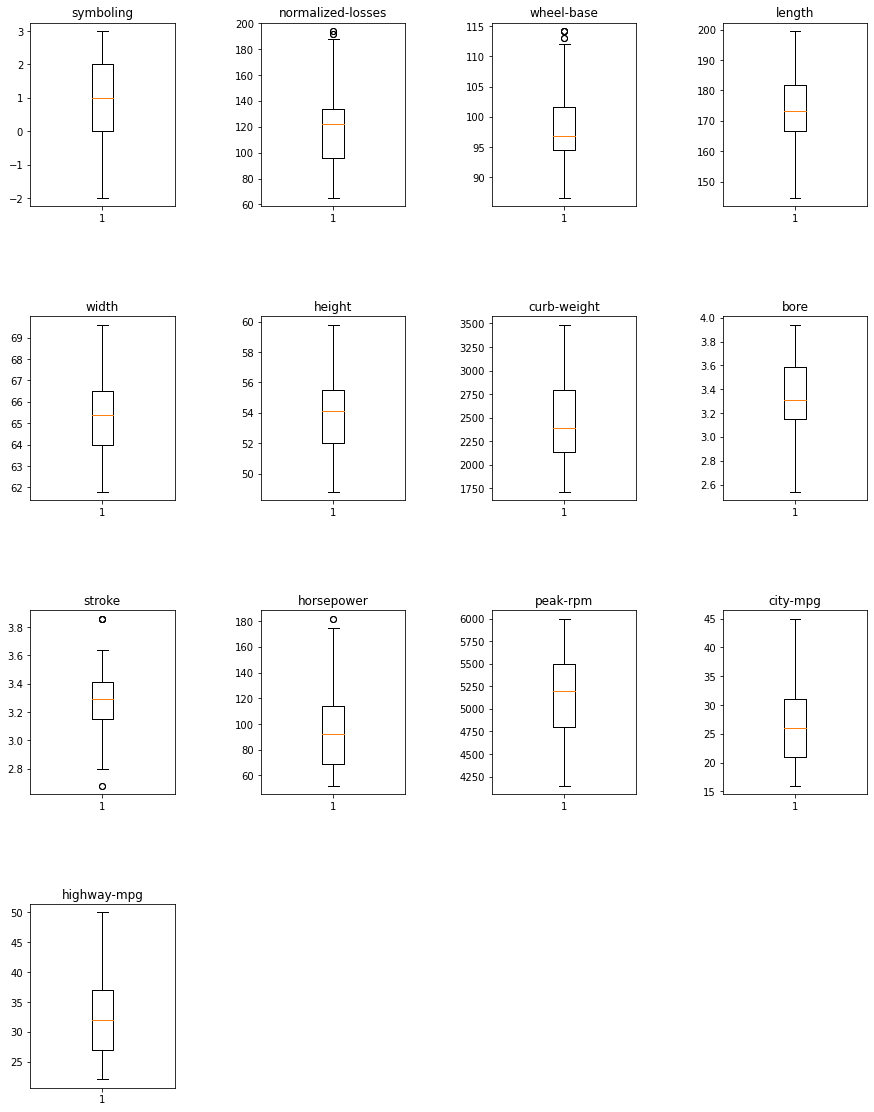

In [25]:
outlier_columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height','curb-weight', 'bore', 'stroke','horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']


i=1

plt.figure(figsize=(15, 25))

for col in outlier_columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    upper_index=np.where(data[col] >= upper)[0]
    lower_index=np.where(data[col] <= lower)[0]
    
    data.drop(index= upper_index , inplace = True)
    data.drop(index= lower_index , inplace = True)
    
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(5,4,i)
    i=i+1
    plt.boxplot(data[col])
    plt.title(col)
    
    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)
    #data.reset_index(drop=True, inplace=True)
    

### Spliting into Independent Variable and Dependent Variable

In [26]:
x=data.drop('price', axis = 1)

In [27]:
y=data['price']

### Spliting the data into training and testing data

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=120)

### Creating the model and training the model

In [29]:
model = KNeighborsRegressor()
model.fit(x_train,y_train)

KNeighborsRegressor()

### Training vs Testing Score

In [30]:
print("Train Score",model.score(x_train,y_train))
print("Test Score",model.score(x_test,y_test))

Train Score 0.7648756349002404
Test Score 0.7491148168423634


### Creating the model with No.of Tree((n_neighbors=3) and training the model

In [31]:
model1 = KNeighborsRegressor(n_neighbors=3)
model1.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

### Training vs Testing Score

In [32]:
print("Train Score",model1.score(x_train,y_train))
print("Test Score",model1.score(x_test,y_test))

Train Score 0.8356059237962914
Test Score 0.7520282870084504


### Prediction using Test Data

In [33]:
y_pred = model1.predict(x_test)
pd.DataFrame({'True Value' : y_test ,'Predicted Value' : y_pred })

,True Value,Predicted Value
18,6229,6370.000000
155,22625,17518.333333
30,9095,12423.333333
69,7099,6588.000000
118,9258,7764.666667
74,7799,7865.666667
140,9995,11963.333333
2,16500,13965.333333
66,9279,11062.666667
92,18150,20208.333333


### Error of the Model

In [34]:
print("mean_squared_error : " ,mean_squared_error(y_test,y_pred))
print("mean_absolute_error : ",mean_absolute_error(y_test,y_pred))

mean_squared_error :  4666130.979166666
mean_absolute_error :  1701.625
